# **LARGE LANGUAGE MODELS (LLMs) GENERATED TEXT DETECTION USING LOGISTIC REGRESSION**

### **Loading Datasets**

In [ ]:
import pandas as pd
data1=pd.read_csv("/content/drive/MyDrive/Training_Essay_Data.csv")
data2=pd.read_csv("/content/drive/MyDrive/final_test.csv")
data3=pd.read_csv("/content/drive/MyDrive/final_train.csv")

In [ ]:
print(data1["generated"].value_counts()) # for checking values.
data1.head(3)

generated
0    17508
1    11637
Name: count, dtype: int64


,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1


In [ ]:
print(data2["label"].value_counts())
data2.head(3)

label
0    55845
1    30742
Name: count, dtype: int64


,text,label
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0


In [ ]:
print(data3["label"].value_counts())
data3.head(3)

label
0    222154
1    124823
Name: count, dtype: int64


,text,label
0,We should keep the Electoral College for a num...,0
1,More and more money is spent on building theat...,1
2,Limiting car usage can actually be effective b...,0


In [ ]:
# rename the column names of data2 and data3
data2 = data2.rename(columns={'label': 'generated'})
data3 = data3.rename(columns={'label': 'generated'})

In [ ]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [ ]:
data.isnull().sum()

text         0
generated    0
dtype: int64

In [ ]:
data["generated"].value_counts()

generated
0    295507
1    167202
Name: count, dtype: int64

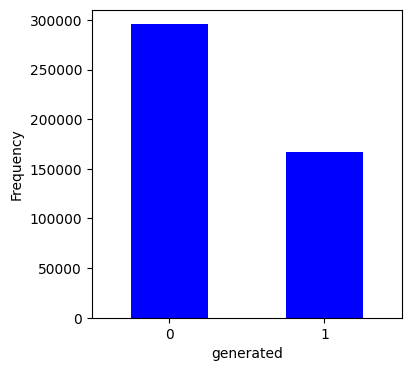

In [ ]:
import matplotlib.pyplot as plt

offer = data['generated']
offer_sum = offer.value_counts()
plt.figure(figsize = (4,4))
offer_sum.plot(kind='bar',color='blue')
plt.xlabel('generated')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Count the occurrences of each class
class_counts = data['generated'].value_counts()

# Find the minority and majority class labels
minority_class_label = class_counts.idxmin()
majority_class_label = class_counts.idxmax()

# Count the difference in occurrences between the two classes
class_difference = class_counts[majority_class_label] - class_counts[minority_class_label]

# Sample from the majority class to match the minority class
data = data.drop(data[data['generated'] == majority_class_label].sample(n=class_difference).index)

In [ ]:
data['generated'].value_counts()

generated
1    167202
0    167202
Name: count, dtype: int64

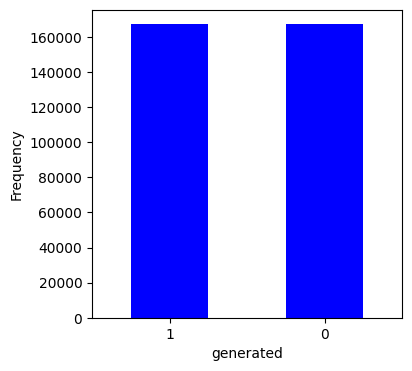

In [ ]:
import matplotlib.pyplot as plt

offer = data['generated']
offer_sum = offer.value_counts()
plt.figure(figsize = (4,4))
offer_sum.plot(kind='bar',color='blue')
plt.xlabel('generated')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### **Seperate Independent and Dependent Variables**

In [ ]:
import numpy as np
x = data['text']
y = data['generated']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Training the Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import set_config

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),  # TF-IDF vectorizer
    ('logistic_reg', LogisticRegression())  # Logistic regression model
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)
# Visualize the pipeline
set_config(display='diagram')
pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('logistic_reg', LogisticRegression())])

### **Evaluation of Model Performance**

In [ ]:
# Predicting on the testing set
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluating the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Train Accuracy :", accuracy_train)

# Generating classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9967703832179543
Train Accuracy : 0.9979328880133671
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33444
           1       1.00      1.00      1.00     33437

    accuracy                           1.00     66881
   macro avg       1.00      1.00      1.00     66881
weighted avg       1.00      1.00      1.00     66881



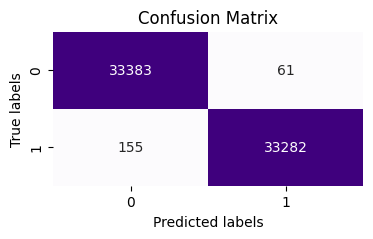

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# prompt:write story of a little girl and three bears in a paragraph
# ex1 : chatgtp
# ex2 : copilot
# ex3 : gemini
#ex4: Human
ex1 = 'Once upon a time, in a quaint forest nestled between rolling hills and babbling brooks, lived a curious little girl named Lily. With her golden locks bouncing as she skipped through the woods, Lily stumbled upon a cozy cottage, its chimney puffing gently with wisps of smoke. Intrigued, she tiptoed closer and peeked through the window to discover three bears: Papa Bear, Mama Bear, and Baby Bear, enjoying bowls of steaming porridge at the wooden table. Lilys eyes widened with wonder as she watched the family of bears, her heart pounding with excitement at the unexpected encounter.'
ex2 = 'Once upon a time, in a quaint forest, there lived a curious little girl named **Lila**. She loved exploring the woods, and one day, she stumbled upon a cozy cottage. The door was ajar, and inside, she found three bowls of porridge: one too hot, another too cold, and the third just right. As she tasted the porridge, she heard a creaking sound. To her surprise, three bears entered the room—the **papa bear**, the **mama bear**, and the **baby bear**. Lilas eyes widened, and she darted out of the cottage, leaving behind a trail of giggles and a memory that would last a lifetime. 🌿🐻'
ex3 = 'once upon a time a little girls came to visit woods with her parents. but she lost her parents unfortunately. while stambling in the woods she found a little house and she entered the house though she was scared. there she saw a little bit and middle size bed and a big bed. then she saw a little pot a medium size pot and then a bigger pot. Everything there was in three sizes. She found there something to eat and slept. When she wake up she saw three bears in front of her. She was scared. She ran, ran and ran away and never looked back.'
ex4="He is going to school. "

unseen_data = [ex4]
predictions = pipeline.predict(unseen_data)

for i, prediction in enumerate(predictions):
    print(f"Prediction for data {i + 1}: {'Generated by AI' if prediction == 1 else 'Generated by Humans'}")


Prediction for data 1: Generated by Humans


In [ ]:
import pickle
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
from joblib import dump

# Save the trained pipeline (including TF-IDF vectorizer and logistic regression model)
dump(pipeline, 'train_model.joblib')

['train_model.joblib']